In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Barbara.bmp to Barbara.bmp
Saving Elaine.bmp to Elaine.bmp
Saving Goldhill.bmp to Goldhill.bmp


In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt

(512, 512, 3)


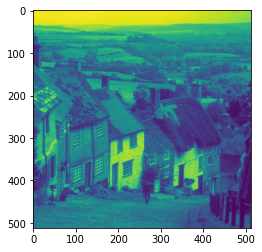

In [2]:
image = cv2.imread("Elaine.bmp")
image8 = cv2.imread("Elaine.bmp")
image64 = cv2.imread("Elaine.bmp")
image32 = cv2.imread("Elaine.bmp")
imageB = cv2.imread('Goldhill.bmp')
imageB = cv2.cvtColor(imageB,cv2.COLOR_BGR2GRAY)
print(image.shape)
plt.imshow(imageB)


1.1.2

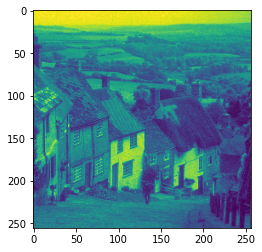

In [3]:
resized_image_without_averaging = imageB[::2,::2]
plt.imshow(resized_image_without_averaging)

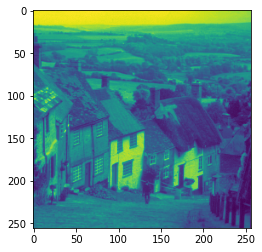

In [4]:
resized_image_with_averaging = np.zeros((256,256))
for i in range(0, 512, 2):
    for j in range(0, 512, 2):
      resized_image_with_averaging[int(i/2), int(j/2)] = np.mean(imageB[i:i + 2, j:j+2], axis=(0,1))
plt.imshow(resized_image_with_averaging)

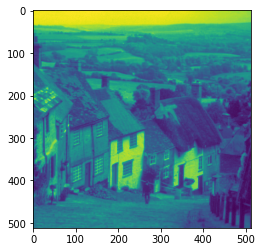

In [5]:
up_with_replication = np.zeros((512,512))
for i in range(0,512):
  for j in range(0,512):
    up_with_replication[i,j] = resized_image_with_averaging[int(i/2),int(j/2)]
plt.imshow(up_with_replication)

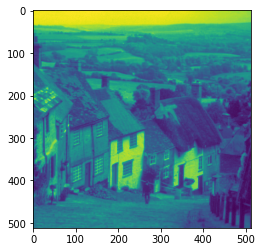

In [6]:
up_with_replication = np.zeros((512,512))
for i in range(0,512):
  for j in range(0,512):
    up_with_replication[i,j] = resized_image_with_averaging[int(i/2),int(j/2)] + resized_image_with_averaging[int(i/2),int(j/2)] + resized_image_with_averaging[int(i/2),int(j/2)] +resized_image_with_averaging[int(i/2),int(j/2)]
plt.imshow(up_with_replication)

In [7]:

def interpolate_bilinear(array_in, width_in, height_in, array_out, width_out, height_out):
    for i in range(height_out):
        for j in range(width_out):
            # Relative coordinates of the pixel in output space
            x_out = j / width_out
            y_out = i / height_out

            # Corresponding absolute coordinates of the pixel in input space
            x_in = (x_out * width_in)
            y_in = (y_out * height_in)

            # Nearest neighbours coordinates in input space
            x_prev = int(np.floor(x_in))
            x_next = x_prev + 1
            y_prev = int(np.floor(y_in))
            y_next = y_prev + 1

            # Sanitize bounds - no need to check for < 0
            x_prev = min(x_prev, width_in - 1)
            x_next = min(x_next, width_in - 1)
            y_prev = min(y_prev, height_in - 1)
            y_next = min(y_next, height_in - 1)
            
            # Distances between neighbour nodes in input space
            Dy_next = y_next - y_in;
            Dy_prev = 1. - Dy_next; # because next - prev = 1
            Dx_next = x_next - x_in;
            Dx_prev = 1. - Dx_next; # because next - prev = 1
            
            array_out[i][j] = Dy_prev * (array_in[y_next][x_prev] * Dx_next + array_in[y_next][x_next] * Dx_prev) \
            + Dy_next * (array_in[y_prev][x_prev] * Dx_next + array_in[y_prev][x_next] * Dx_prev)
            
                
    return array_out

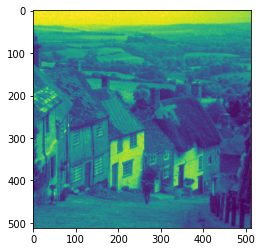

In [9]:
out1 = interpolate_bilinear(resized_image_with_averaging,256,256,np.zeros((512,512)),512,512)
plt.imshow(out1)

out2 = interpolate_bilinear(resized_image_without_averaging,256,256,np.zeros((512,512)),512,512)
plt.imshow(out2)


In [10]:
np.sqrt(np.mean((imageB - out1)**2))
np.sqrt(np.mean((imageB - out2)**2))


8.062746029434155

1.1.1

In [11]:
def histogram(img, level):
  pixels=[]
  lvl = 256//level
  #create list of values 0-255
  for x in range(0, 256, lvl):
    pixels.append(x)
  #initialize width and height of image
  size=img.shape
  width = size[0]
  height = size[1]
  counts=[]
  #for each intensity value
  for i in pixels:
    #set counter to 0
    temp=0

    #traverse through the pixels
    for x in range(width):
      for y in range(height):

        #if pixel intensity equal to intensity level
        #increment counter
        pixel = img[x][y]
        pixel = (pixel//lvl)
        if (pixel[0]*lvl==i):
          temp=temp+1
          img[x][y]=[i ,i ,i]

    #append frequency of intensity level 
    counts.append(temp)

  return pixels,counts, img

In [12]:
def equal_histogram(img, level, cdf):
  pixels=[]
  lvl = 256//level
  #create list of values 0-255
  for x in range(0, 256, lvl):
    pixels.append(x)
  #initialize width and height of image
  x = [(pixels[i],cdf[i]) for i in range(level)]
  size=img.shape
  width = size[0]
  height = size[1]
  counts=[]
  #for each intensity value
  for i in x:
    #set counter to 0
    temp=0

    #traverse through the pixels
    for x in range(width):
      for y in range(height):

        #if pixel intensity equal to intensity level
        #increment counter
        pixel = img[x][y]
        pixel = (pixel//lvl)
        if (pixel[0]*lvl==i[0]):
          temp=temp+1
          
          o = int(i[1])
          img[x][y]=[o ,o ,o]

    #append frequency of intensity level 
    counts.append(temp)

  return pixels,counts,img

In [13]:
def normalizeHistogram(pdf,width,length):
    normal_pdf = np.zeros(len(pdf))
    print(normal_pdf)
    for i in range(len(normal_pdf)):
        normal_pdf[i] = pdf[i]/(width*length)

    return normal_pdf

In [14]:
def calc_cdf(normal_pdf):

    cdf = np.zeros(len(normal_pdf))

    for i in range(len(normal_pdf)):
        for j in range(i):
            cdf[i] += normal_pdf[j]
    
        cdf[i] *=255
        cdf[i] = int(round(cdf[i]))
        
    
    return cdf

[1, 0, 21, 162, 865, 2500, 4798, 7148, 8251, 9110, 10035, 11382, 12554, 13120, 15151, 17663, 18400, 17851, 16676, 15186, 13265, 12487, 11511, 10700, 8149, 5430, 4340, 5052, 6600, 3609, 127, 0]


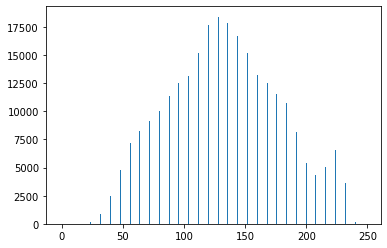

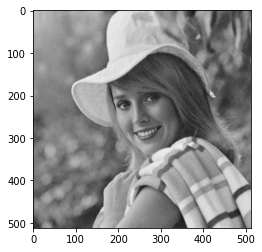

In [15]:
#function to plot histogram
# histogram(image)
pixels,counts,im = histogram(image8, 32)
# #plot histogram
print(counts)
plt.bar(pixels,counts)
plt.show()
plt.imshow(im)

[1, 0, 21, 162, 865, 2500, 4798, 7148, 8251, 9110, 10035, 11382, 12554, 13120, 15151, 17663, 18400, 17851, 16676, 15186, 13265, 12487, 11511, 10700, 8149, 5430, 4340, 5052, 6600, 3609, 127, 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[  0.   0.   0.   0.   0.   1.   3.   8.  15.  23.  32.  42.  53.  65.
  78.  93. 110. 128. 145. 161. 176. 189. 201. 212. 223. 231. 236. 240.
 245. 251. 255. 255.]


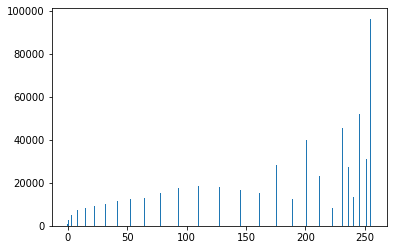

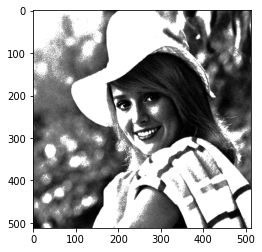

In [16]:
print(counts)
a = calc_cdf(normalizeHistogram(counts, 512, 512))
print(a)
pixels,counts,im1 = equal_histogram(image32, 32, a)
# #plot histogram
plt.bar(a,counts)
plt.show()
plt.imshow(im1)

1.1.3

In [17]:
def get_bit_planes(image, bit_planes):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i][j] = image[i][j] & bit_planes
    image = (((image - image.min()) / (image.max() - image.min())) * 255.0).astype('uint8')
    return image



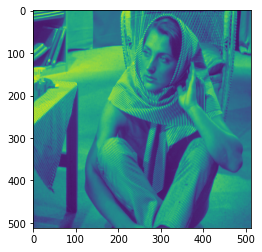

In [18]:
img1 = cv2.imread('Barbara.bmp', cv2.IMREAD_GRAYSCALE)
img2 = get_bit_planes(img1.copy(), 0b00010000)
img3 = get_bit_planes(img1.copy(), 0b00001000)
img4 = get_bit_planes(img1.copy(), 0b00000100)
img5 = get_bit_planes(img1.copy(), 0b00000010)


titles = ['all bits', '5', '4', '3', '2', '1']
plt.imshow(img1)

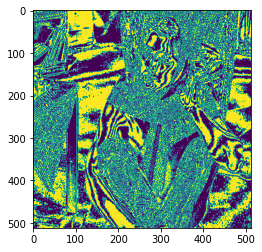

In [19]:
plt.imshow(img2)

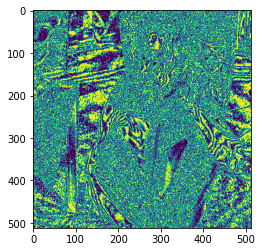

In [20]:
plt.imshow(img3)